<a href="https://colab.research.google.com/github/gabrielcostapassos/Python-Data-Science/blob/master/Hotel_reviews_classificator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title **Montar Google Drive e dar permissão** { vertical-output: true}
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introdução


A escolha de um hotel é uma tarefa difícil. São diversos fatores que podem contribuir para uma boa escolha e mesmo assim, podemos escolher errado.

Para ajudar os futuros viajantes a terem uma experiência melhor, a ideia é classificar os reviews para ajudar a achar informações que lhes sejam úteis para formar uma opinião justa a respeito do hotel avaliado.

Usaremos uma base de dados de avaliações de hotéis extraída do site https://www.booking.com. 
Está base contém 515 mil avaliações de hotéis na Europa. 

Onde cada observação consiste em uma avaliação de cliente para um hotel.

Cada avaliação do cliente é composta por um feedback textual da experiência do cliente no hotel e uma avaliação geral. 

Assim observando as avaliações dos hotéis, podemos obter informações sobre os hotéis mais bem avaliados e prever qual é o melhor hotel para se hospedar durante sua visita à Europa. 

Os dados podem ser encontrados aqui: https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe

Para cada revisão textual, queremos prever se corresponde a uma boa avaliação (o cliente está feliz) ou a uma má (o cliente está insatisfeito). 

As avaliações gerais das avaliações podem variar de 2,5 à 10. 

Para simplificar o problema, vamos dividi-los em duas categorias:

* As críticas negativas têm classificações gerais <5
* Boas críticas têm classificações gerais> = 5

O desafio aqui é ser capaz de prever essas informações usando apenas os dados textuais brutos.

# Analise Exploratória dos Dados

Este conjunto de dados contém 515.738 avaliações de clientes e pontuação de 1493 hotéis de luxo em toda a Europa. 

O arquivo csv contém 17 campos. A descrição de cada campo é a seguinte:

**Hotel_Address:** Endereço do hotel.

**Review_Date:** Data em que o hóspede postou o comentário.

**Average_Score:** Pontuação média do hotel, calculada com base no último comentário do ano anterior.

**Hotel_Name:** Nome do Hotel

**Reviewer_Nationality:** Nacionalidade do hóspede.

**Negative_Review:** Comentário negativo que o hóspede deu ao hotel. Se o hóspede não der a avaliação negativa, ela deve ser: 'No negative'

**Review_Total_Negative_Word_Counts:** Número total de palavras no comentário negativa.

**Positive_Review:** Comentário positivo que o hóspede deu ao hotel. Se o hóspede não der a crítica negativa, ela deve ser: 'No positive'

**Review_Total_Positive_Word_Counts:** Número total de palavras no comentário positivo.

**Reviewer_Score:** Pontuação que o hóspede deu ao hotel, com base em sua experiência

**Total_Number_of_Reviews_Reviewer_Has_Given:** Número de avaliações que os hóspedes deram no passado.

**Total_Number_of_Reviews:** Número total de comentários válidos que o hotel possui.

**Tags:** O hóspede deu ao hotel.

**Days_since_review:** Duração entre a data do comentário e a data do post.

**Additional_Number_of_Scoring:** Indica quantas pontuações válidas sem comentários existem.

**lat:** Latitude do hotel

**lng:** Longtitude do hotel

In [ ]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Caminho onde está o arquivo
caminho_arquivo = '/content/drive/My Drive/Colab Notebooks/data/Hotel_Reviews.csv'

reviews = pd.read_csv(caminho_arquivo, dtype=str)#, nrows=36000)

# Exibir os 2 primeiros registros do dataframe
reviews.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.3605759,4.9159683
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.3605759,4.9159683


In [ ]:
# Verificando quantidade de linha e colunas do Dataframe
reviews.shape

(515738, 17)

In [ ]:
# Verificando as caracteristicas do Dataframe
reviews.describe()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
count,515738,515738,515738,515738,515738,515738,515738,515738,515738,515738,515738,515738,515738,515738,515738,512470,512470
unique,1493,480,731,34,1492,227,330011,402,1142,412601,365,198,37,55242,731,1472,1472
top,163 Marsh Wall Docklands Tower Hamlets London ...,2682,8/2/2017,8.4,Britannia International Hotel Canary Wharf,United Kingdom,No Negative,0,9086,No Positive,0,1,10,"[' Leisure trip ', ' Couple ', ' Double Room '...",1 days,51.5019097,-0.0232208
freq,4789,4789,2585,41222,4789,245246,127890,127890,4789,35946,35946,154640,115853,5101,2585,4789,4789


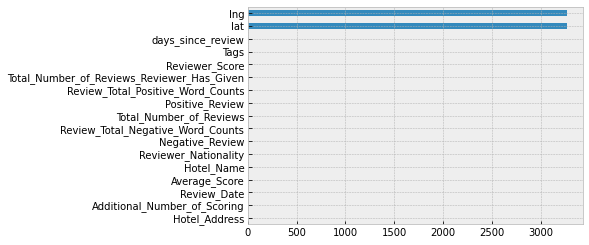

In [ ]:
# Verificando valorer nulos
plt.style.use('bmh')
reviews.isnull().sum().plot(kind='barh')

In [ ]:
reviews['Negative_Review'][0]

' I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin y

# Preparação dos Dados e Criação do Modelo

In [ ]:
# Removendo valores "No Negative" e no "No Positive", que foram inseridos quando não há review.
reviews["Negative_Review"] = reviews["Negative_Review"].apply(lambda x: x.replace("No Negative", ""))
reviews["Positive_Review"] = reviews["Positive_Review"].apply(lambda x: x.replace("No Positive", ""))

# Concatenando os reviews positivos e negativos
reviews["review"] = reviews["Negative_Review"] + reviews["Positive_Review"]

# Aplicando 1 para reviews positivos e 0 para negativos de acordo com o score atribuido
reviews.Reviewer_Score = pd.to_numeric(reviews.Reviewer_Score).astype(pd.Float64Index(reviews.Reviewer_Score))
reviews["label"] = reviews["Reviewer_Score"].apply(lambda x: 1 if x > 5 else 0)


df_reviews = reviews[["review", "label"]]
# Separados positivos e negativos em 2 dataframes
df_negative = df_reviews.query("label == 0")
df_positive = df_reviews.query("label == 1")
df_reviews.head(3)

,review,label
0,I am so angry that i made this post available...,0
1,No real complaints the hotel was great great ...,1
2,Rooms are nice but for elderly a bit difficul...,1


In [ ]:
#Selecionado uma base randomica de 18k registros negativos
import random
import numpy as np
# fixar semente aleatória - sempre o mesmo resultado
random.seed(100)
N = len(df_negative)
n = 18000
idx = random.sample(range(0, N-1), n)
df_negative = df_negative.iloc[idx,:]

In [ ]:
#Selecionado uma base randomica de 18k registros positivos
import random
import numpy as np
# fixar semente aleatória - sempre o mesmo resultado
random.seed(100)
N = len(df_positive)
n = 18000
idx = random.sample(range(0, N-1), n)
df_positive = df_positive.iloc[idx,:]

In [ ]:
# Concatenado os 2 dataframes
df_reviews = pd.concat([df_positive, df_negative] , sort = False)

In [ ]:
df_reviews.shape

(36000, 2)

In [ ]:
df_reviews['review'][0]

' I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs the same as a simple double but got way more volume due to the high ceiling was offered a room but only the next day SO i had to check out the next day before 11 o clock in order to get the room i waned to Not the best way to begin y

In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('rslp')
nltk.download('punkt')

stemmer = nltk.stem.RSLPStemmer()

def stemmer_tokenizer(doc):
  # considerar somente termos com letras e pelo menos 3 caracteres
    termos = [termo for termo in nltk.word_tokenize(doc) if re.match(r'^[^\W\d]{3,}$', termo)]    
    # aplicar stemmer
    termos = [stemmer.stem(termo) for termo in termos]
    return termos

# stopwords stemmer
stopwords = [stemmer.stem(s) for s in nltk.corpus.stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# criar vetor de características X com a contagem por tf.idf
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(binary=False, norm='l1', use_idf=True, stop_words=stopwords, tokenizer=stemmer_tokenizer)
y = df_reviews.label
X = vectorizer.fit_transform(df_reviews.review.str.lower())
X

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau', 'bef', 'could', 'might', 'must', 'need', 'sha', 'tho', 'wh', 'would'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<36000x19241 sparse matrix of type '<class 'numpy.float64'>'
	with 680389 stored elements in Compressed Sparse Row format>

In [ ]:
# dividir em conjunto de treinamento e testes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
X_train.shape, X_test.shape

((25200, 19241), (10800, 19241))

In [ ]:
# criar e treinar modelo de árvore de decisão
from sklearn import tree
dtree = tree.DecisionTreeClassifier(random_state=88, criterion='entropy')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=88, splitter='best')

In [ ]:
# aplicar modelo no conjunto de testes
y_predict = dtree.predict(X_test)
y_predict

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
# avaliar acurácia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test,y_predict)
acuracia

0.7374074074074074

In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, columns=['Predito 0', 'Predito 1'], index=['Real 0', 'Real 1'])

df_cm

,Predito 0,Predito 1
Real 0,4025,1375
Real 1,1461,3939


In [ ]:
#@title Precisão, Revocação e F1 { vertical-output: true }
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
prf = precision_recall_fscore_support(y_test, y_predict)

df_prf = pd.DataFrame(prf[:-1], columns=[0,1], index=['precisão', 'revocação', 'F1'])
df_prf

,0,1
precisão,0.733686,0.741250
revocação,0.745370,0.729444
F1,0.739482,0.735300


In [ ]:
# Algoritmos de classificação Naive Bayes
from sklearn import naive_bayes
bayes = naive_bayes.GaussianNB()
bayes.fit(X_train.toarray(), y_train)

y_predict = bayes.predict(X_test.toarray())

In [ ]:
# avaliar acurácia
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, y_predict)
acuracia

0.5882407407407407

In [ ]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, columns=['Predito 0', 'Predito 1'], index=['Real 0', 'Real 1'])

df_cm

,Predito 0,Predito 1
Real 0,1724,3676
Real 1,771,4629


In [ ]:
#@title Precisão, Revocação e F1 { vertical-output: true }
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
prf = precision_recall_fscore_support(y_test, y_predict)

df_prf = pd.DataFrame(prf[:-1], columns=[0,1], index=['precisão', 'revocação', 'F1'])
df_prf

,0,1
precisão,0.180117,0.861662
revocação,0.732778,0.332889
F1,0.289159,0.480244


Dentre os modelos testados o que obteve melhor resultado foi o modelo de classificação de Árvore de Decisão com uma acurácia de 0,737.